In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

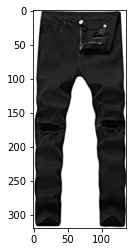

In [12]:
DATADIR = r"C:\Users\saurabh\Downloads\New folder\Dataset"

CATEGORIES = ["jeans", "saree", "trouser"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to jeans, saree and trouser
    for img in os.listdir(path):  # iterate over each image per jeans, saree, trouser
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray') #graph it
        plt.show()  # display!

        break
    break

In [17]:
import pathlib
data_dir = pathlib.Path(DATADIR)
data_dir

WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-81vZv4VL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-ewQ6RgtL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/516VgyqYSkL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/518BnYuS03L._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51c+tX6MaoL._AC_UL320_.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

845


In [20]:
jeans = list(data_dir.glob('jeans/*'))
jeans[:5]

[WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-81vZv4VL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-ewQ6RgtL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/516VgyqYSkL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/518BnYuS03L._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51c+tX6MaoL._AC_UL320_.jpg')]

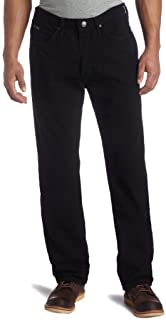

In [21]:
PIL.Image.open(str(jeans[1]))

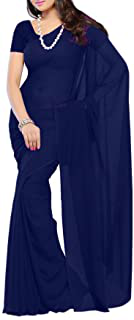

In [22]:
saree = list(data_dir.glob('saree/*'))
PIL.Image.open(str(saree[0]))

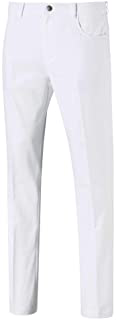

In [23]:
trouser = list(data_dir.glob('trouser/*'))
PIL.Image.open(str(trouser[0]))

### Read dataset images from disk into numpy array using opencv

In [25]:
clothes_images_dict = {
    'jeans': list(data_dir.glob('jeans/*')),
    'saree': list(data_dir.glob('saree/*')),
    'trouser': list(data_dir.glob('trouser/*')),
}

In [26]:
clothes_labels_dict = {
    'jeans': 0,
    'saree': 1,
    'trouser': 2,
}

In [27]:
clothes_images_dict['jeans'][:5]

[WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-81vZv4VL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51-ewQ6RgtL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/516VgyqYSkL._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/518BnYuS03L._AC_UL320_.jpg'),
 WindowsPath('C:/Users/saurabh/Downloads/New folder/Dataset/jeans/51c+tX6MaoL._AC_UL320_.jpg')]

In [29]:
str(clothes_images_dict['jeans'][0])

'C:\\Users\\saurabh\\Downloads\\New folder\\Dataset\\jeans\\51-81vZv4VL._AC_UL320_.jpg'

In [30]:
img = cv2.imread(str(clothes_images_dict['jeans'][0]))

In [31]:
img.shape

(320, 137, 3)

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X, y = [], []

for clothe_name, images in clothes_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(clothes_labels_dict[clothe_name])

In [34]:
X = np.array(X)
y = np.array(y)

### Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

In [37]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
20/20 [==============================] - 8s 368ms/step - loss: 1.3482 - accuracy: 0.4516
Epoch 2/30
20/20 [==============================] - 7s 355ms/step - loss: 0.5007 - accuracy: 0.7734
Epoch 3/30
20/20 [==============================] - 7s 357ms/step - loss: 0.3872 - accuracy: 0.8520
Epoch 4/30
20/20 [==============================] - 7s 373ms/step - loss: 0.2880 - accuracy: 0.8936
Epoch 5/30
20/20 [==============================] - 7s 369ms/step - loss: 0.2441 - accuracy: 0.9027
Epoch 6/30
20/20 [==============================] - 7s 368ms/step - loss: 0.1985 - accuracy: 0.9241
Epoch 7/30
20/20 [==============================] - 7s 368ms/step - loss: 0.1507 - accuracy: 0.9300
Epoch 8/30
20/20 [==============================] - 8s 376ms/step - loss: 0.1340 - accuracy: 0.9427
Epoch 9/30
20/20 [==============================] - 7s 366ms/step - loss: 0.0957 - accuracy: 0.9734
Epoch 10/30
20/20 [==============================] - 7s 372ms/step - loss: 0.0630 - accuracy: 0.9846

In [38]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 1s 75ms/step - loss: 0.3848 - accuracy: 0.8868


[0.38475191593170166, 0.8867924809455872]

### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (88.67%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [39]:
predictions = model.predict(X_test_scaled)
predictions

array([[-1.53119254e+00, -1.59705219e+01,  2.68109345e+00],
       [-4.76697206e+00, -1.60480766e+01,  3.85485554e+00],
       [-1.27186048e+00, -1.80919743e+01,  3.12225294e+00],
       [-5.57793140e+00,  1.97309914e+01, -1.01739416e+01],
       [-5.13464451e+00, -7.44186687e+00,  1.67567098e+00],
       [-3.49867845e+00,  9.19537926e+00, -6.18424511e+00],
       [-1.68306637e+01,  1.45878868e+01, -4.62851858e+00],
       [-1.99145889e+00,  7.41715384e+00, -6.97422743e+00],
       [-6.00322390e+00, -5.01293516e+00,  1.20532227e+00],
       [ 4.04914618e+00, -1.25652227e+01, -9.96559799e-01],
       [-1.70575428e+01,  6.61053228e+00, -5.44839680e-01],
       [-2.36207414e+00, -1.25970592e+01,  2.72048616e+00],
       [-3.38472009e+00, -1.98540802e+01,  3.95055866e+00],
       [ 7.14185238e+00, -1.92873211e+01,  3.98667097e-01],
       [-1.36663389e+01,  1.50434036e+01, -6.38865757e+00],
       [-1.33663044e+01,  1.78403397e+01, -8.51064014e+00],
       [ 9.45964909e+00, -1.69241467e+01

In [40]:
score = tf.nn.softmax(predictions[0])

In [41]:
np.argmax(score)

2

In [42]:
y_test[0]

2

### Improve Test Accuracy Using Data Augmentation

In [57]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Original Image

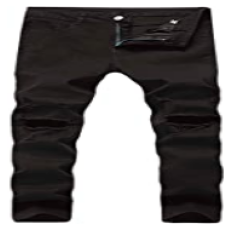

In [48]:
plt.axis('off')
plt.imshow(X[0])

In [49]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [220, 220, 220]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [226, 226, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [233, 233, 233]],

       ...,

       [[ 40,  34,  35],
        [ 36,  30,  31],
        [ 31,  25,  26],
        ...,
        [ 25,  20,  21],
        [ 27,  22,  23],
        [ 29,  23,  24]],

       [[ 32,  27,  27],
        [ 29,  23,  24],
        [ 22,  17,  18],
        ...,
        [ 26,  20,  21],
        [ 27,  22,  23],
        [ 31,  25,  26]],

       [[ 21,  16,  17],
        [ 19,  14,  15],
        [ 12,   8,   9],
        ...,
        [ 24,  20,  2

### Newly generated training sample using data augmentation

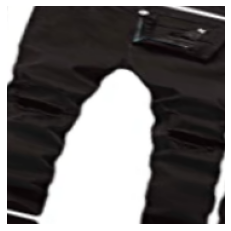

In [59]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [60]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
20/20 [==============================] - 9s 396ms/step - loss: 1.0586 - accuracy: 0.4446
Epoch 2/30
20/20 [==============================] - 8s 409ms/step - loss: 0.6613 - accuracy: 0.7712
Epoch 3/30
20/20 [==============================] - 8s 411ms/step - loss: 0.4777 - accuracy: 0.8016
Epoch 4/30
20/20 [==============================] - 8s 418ms/step - loss: 0.4230 - accuracy: 0.8302
Epoch 5/30
20/20 [==============================] - 8s 410ms/step - loss: 0.4308 - accuracy: 0.8354
Epoch 6/30
20/20 [==============================] - 8s 420ms/step - loss: 0.3387 - accuracy: 0.8715
Epoch 7/30
20/20 [==============================] - 8s 414ms/step - loss: 0.3381 - accuracy: 0.8593
Epoch 8/30
20/20 [==============================] - 9s 425ms/step - loss: 0.3466 - accuracy: 0.8596
Epoch 9/30
20/20 [==============================] - 8s 411ms/step - loss: 0.3348 - accuracy: 0.8696
Epoch 10/30
20/20 [==============================] - 8s 419ms/step - loss: 0.2964 - accuracy: 0.8923

In [61]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 1s 74ms/step - loss: 0.1801 - accuracy: 0.9292


[0.18007293343544006, 0.9292452931404114]

In [86]:
pre=model.predict(X_test_scaled)
pre

array([[-8.41470242e-01, -6.45162249e+00,  3.54393387e+00],
       [-6.83142662e-01, -6.68526506e+00,  3.86505508e+00],
       [-1.09346902e+00, -3.46442294e+00,  2.01195741e+00],
       [-3.98544717e+00,  9.70071220e+00, -1.00301714e+01],
       [-1.44561410e+00, -3.55770564e+00,  2.99671841e+00],
       [-7.06543827e+00,  1.08852434e+01, -7.93158293e+00],
       [-7.52468586e+00,  8.80073166e+00, -6.56852484e+00],
       [-3.75555444e+00,  4.01046753e+00, -3.25217772e+00],
       [-1.77524436e+00, -2.79806709e+00,  2.71926117e+00],
       [ 2.09939361e+00, -6.21657085e+00,  1.28190741e-01],
       [-1.25925713e+01,  1.17006998e+01, -7.18796444e+00],
       [-1.11455929e+00, -3.98226762e+00,  3.43447495e+00],
       [-1.32662803e-01, -6.47078180e+00,  1.32920301e+00],
       [ 4.26273251e+00, -8.64629269e+00,  6.97503984e-02],
       [-6.08502483e+00,  6.54060411e+00, -3.80336475e+00],
       [-4.75432873e+00,  5.08819103e+00, -4.93060637e+00],
       [ 3.05971408e+00, -7.62063265e+00

In [87]:
y_pred_classes = [np.argmax(element) for element in pre]
y_pred_classes

[2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1]

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification_report\n',classification_report(y_test,y_pred_classes))

classification_report
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        78
           1       1.00      1.00      1.00        60
           2       0.92      0.88      0.90        74

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212



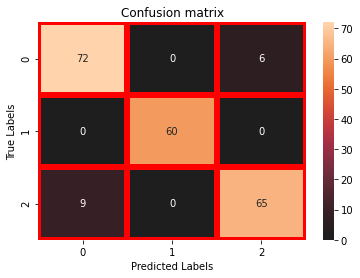

In [90]:
#plot confusion matrix heatmap
import seaborn as sns
conf_mat = confusion_matrix(y_test,y_pred_classes)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidth=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')

plt.show()

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 92.92%